In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

##### Laboratory 3
##### ------------

Сгенерировать выборку точек, равномерно распределенных внутри круга
двумя способами:
1. Равномерно распределить точки внутри квадрата, внутрь которого вписана
окружность, и отфильтровать точки, лежащие за пределами окружности.
2. Генерировать точки путем задания случайного угла и расстояния от центра
окружности.


Радиус окружности R=10, размер выборки 1000 точек.
Для созданных выборок сделать следующее:
1. Создать рисунок, иллюстрирующий расположение точек сгенерированной
выборки внутри окружности;
2. Найти выборочные средние координат точек и их дисперсию;
3. Построить график плотности распределения расстояния от случайной равномерно
распределенной точки в круге до фиксированной точки лежащей вне окружности
(к примеру, с координатами X=20, Y=0).
4. Построить график плотности распределения расстояния между двумя
случайными точками, равномерно расположенными внутри круга.



<h4> Part 1</h4>

Радиус окружности и размер выборки

In [2]:
circle_radius = 10
set_size = 1000

Используем координаты для посторения окружности

In [3]:
set_x = []
set_y = []

dots_counter = 0

while dots_counter < set_size:
    x = np.random.uniform(-10, 10)
    y = np.random.uniform(-10, 10)
    
    #To make it circle, need a condition
    if x*x + y*y < circle_radius**2:
        set_x.append(x)
        set_y.append(y)
        dots_counter += 1

    

Need info for circle, details to draw with linspace

In [4]:
angles = np.linspace(0, 2*np.pi , 1000)
circle_x = circle_radius * np.cos(angles)
circle_y = circle_radius * np.sin(angles)

<h7>Drawing</h7>

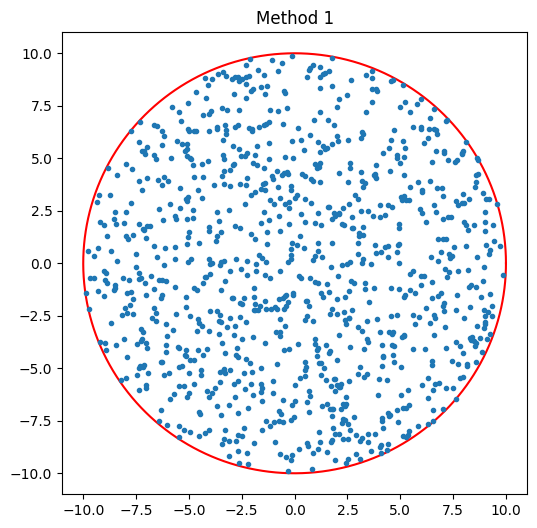

In [5]:
plt.figure(dpi = 100, figsize=(6,6))
plt.title("Method 1")
plt.plot(circle_x, circle_y, "red")
plt.plot(set_x,set_y, '.')
plt.show()

<h4> Method 2, with polar coordinates</h4>

In [6]:
set_x_2 = []
set_y_2 = []

dots_counter_2 = 0

while dots_counter_2 < set_size:
    angle = np.random.uniform(0, 2*np.pi)
    distance = np.random.uniform(0, 10)
    set_x_2.append(distance * np.cos(angle))
    set_y_2.append(distance * np.sin(angle))
    dots_counter_2 += 1
    

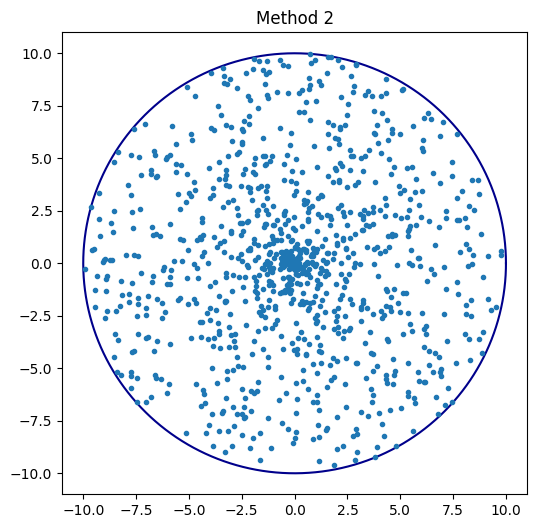

In [7]:
plt.figure(dpi = 100, figsize= (6,6))
plt.title("Method 2")
plt.plot(circle_x, circle_y, "darkblue")
plt.plot(set_x_2, set_y_2, ".")
plt.show()

<h4> Part 2</h4>

1. Найти выборочные средние координат точек и их дисперсию;
2. Построить график плотности распределения расстояния от случайной равномерно
распределенной точки в круге до фиксированной точки лежащей вне окружности
(к примеру, с координатами X=20, Y=0).
3. Построить график плотности распределения расстояния между двумя
случайными точками, равномерно расположенными внутри круга.


In [8]:
print("Mean x for method 1", np.mean(set_x))
print("Mean y for method 1", np.mean(set_y))
print("Mean x for method 2", np.mean(set_x_2))
print("Mean y for method 2", np.mean(set_y_2))

Mean x for method 1 0.13480145980798966
Mean y for method 1 -0.22679655311760644
Mean x for method 2 0.004101868776211461
Mean y for method 2 0.13585800199236922


In [9]:
print("Var x for method 1", np.var(set_x))
print("Var y for method 1", np.var(set_y))
print("Var x for method 2", np.var(set_x_2))
print("Var y for method 2", np.var(set_y_2))

Var x for method 1 24.426464392098293
Var y for method 1 24.601455566396254
Var x for method 2 17.112938559860282
Var y for method 2 18.252463236674497


In [10]:
dot_x = 20
dot_y = 0

In [11]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

<h6>Находим дистанции расстояния от случайной равномерно
распределенной точки в круге до фиксированной точки лежащей вне окружности </h6>

In [12]:
distance_1 = []

for i in range(set_size):
    distance_1.append(dist(set_x[i],set_y[i], dot_x,dot_y))
    
distance_1.sort()

distance_2 = []

for i in range(set_size):
    distance_2.append(dist(set_x_2[i],set_y_2[i], dot_x,dot_y))
    
distance_2.sort()


<h6> Используем для сглаживания плотности </h6>

In [13]:
kde_dist_1_y = gaussian_kde(distance_1).evaluate(distance_1)
kde_dist_2_y = gaussian_kde(distance_2).evaluate(distance_2)

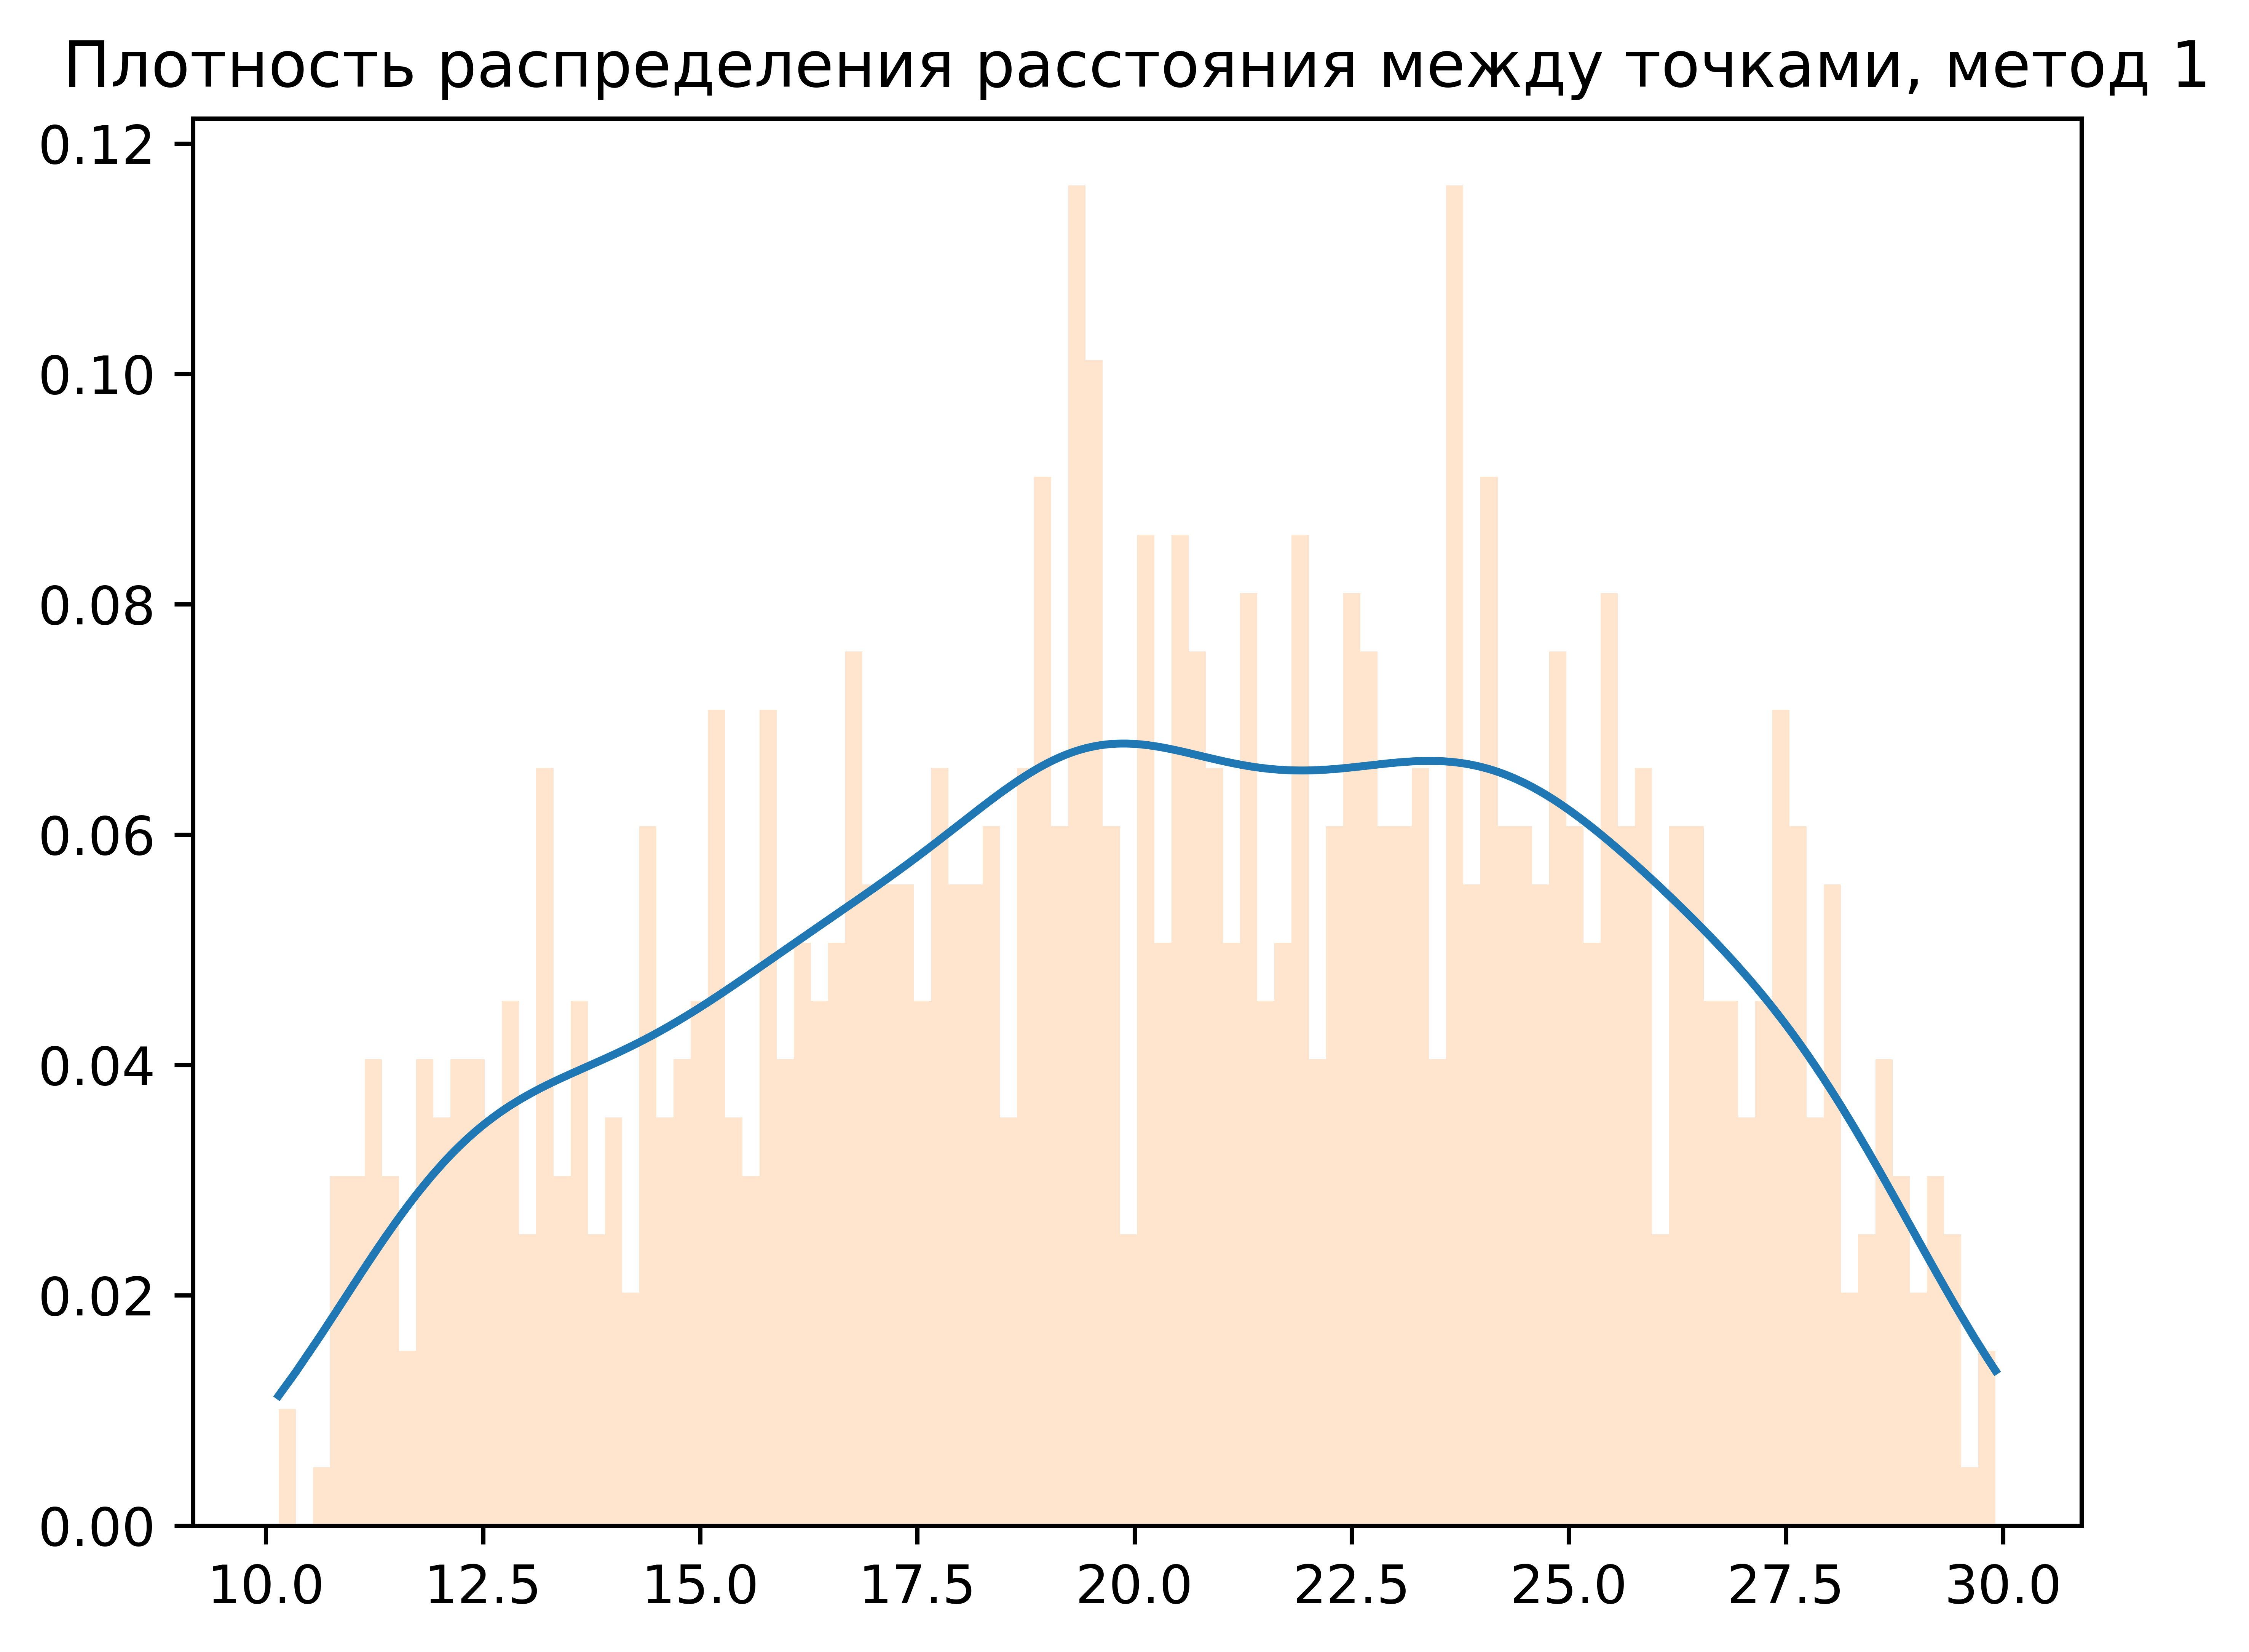

In [14]:
plt.figure(dpi = 1000)
plt.title("Плотность распределения расстояния между точками, метод 1")
plt.plot(distance_1, kde_dist_1_y)
plt.hist(distance_1, bins=100, alpha=0.2, density=True)
plt.show()

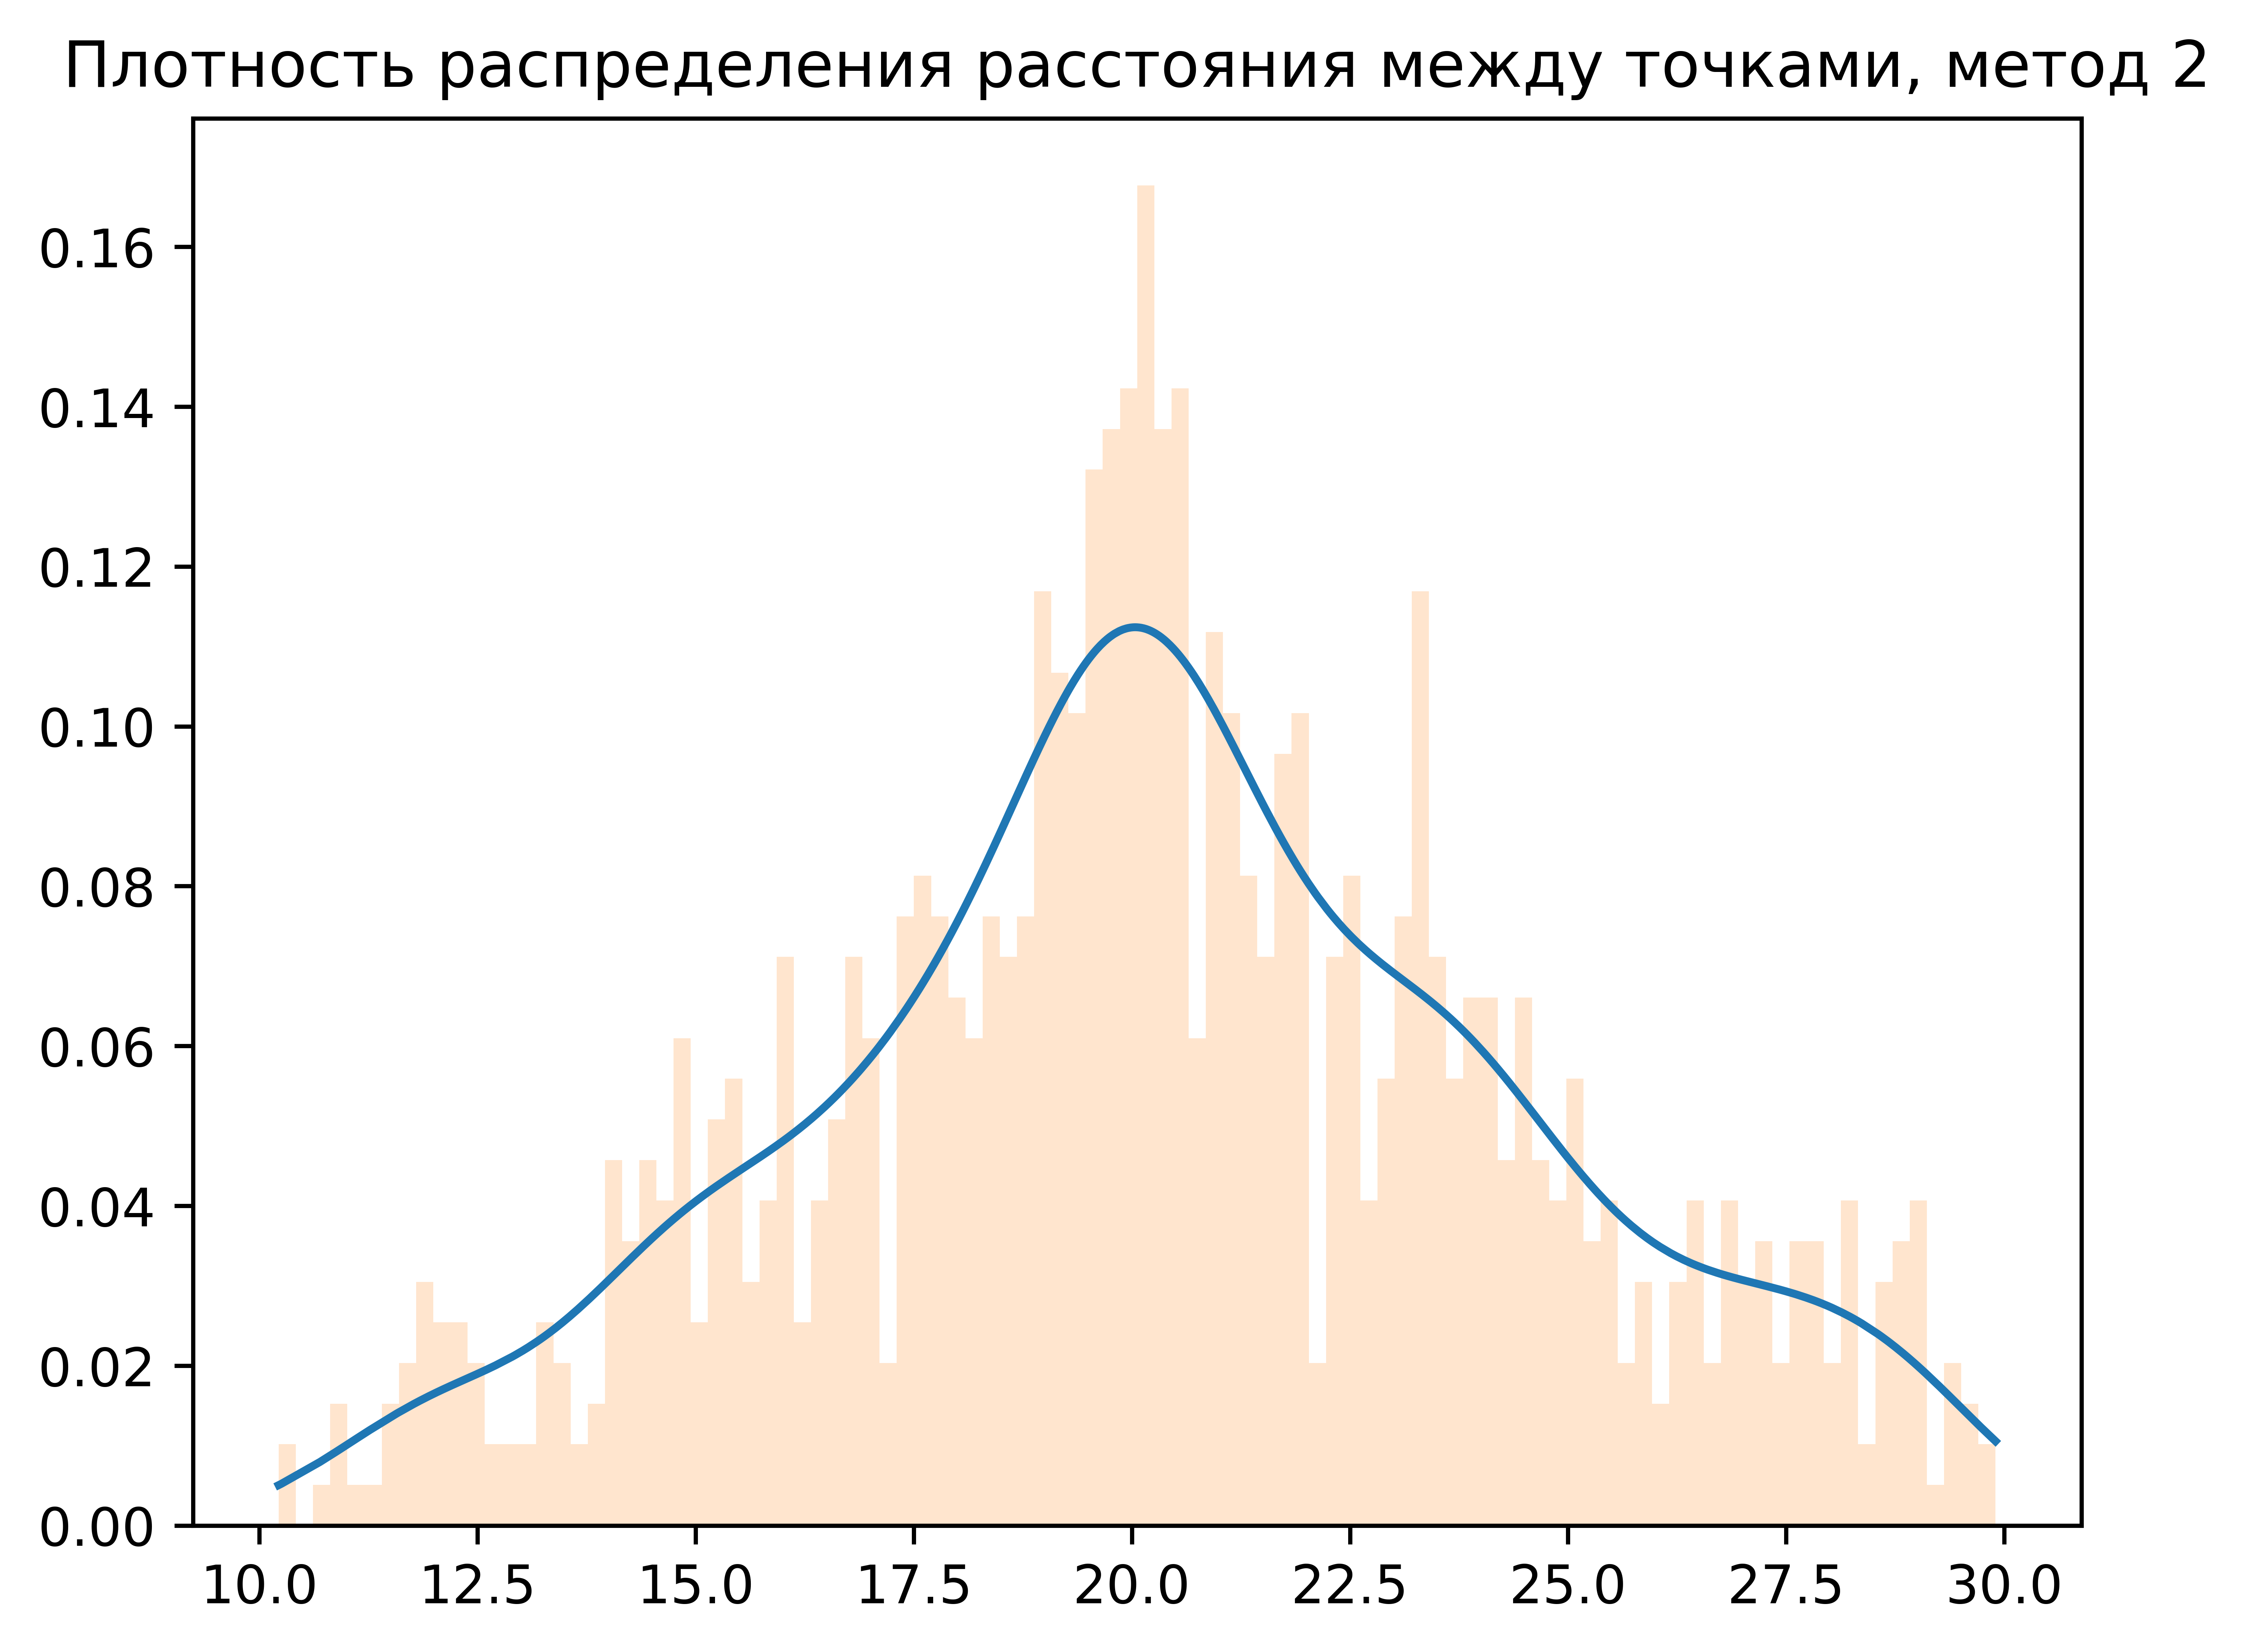

In [15]:
plt.figure(dpi = 1000)
plt.title("Плотность распределения расстояния между точками, метод 2")
plt.plot(distance_2, kde_dist_2_y)
plt.hist(distance_2, bins=100, alpha=0.2, density=True)
plt.show()

Построить график плотности распределения расстояния между двумя
случайными точками, равномерно расположенными внутри круга.

In [16]:
distances_1 = []
distances_2 = []

for i in range(set_size):
    a,b = np.random.randint(0, set_size-1), np.random.randint(0, set_size-1)
    distances_1.append(dist(set_x[a], set_y[a], set_x[b], set_y[b]))
    distances_2.append(dist(set_x_2[a], set_y_2[a], set_x_2[b], set_y_2[b]))

distances_1.sort()
distances_2.sort()

In [17]:
kde_dist_1_y = gaussian_kde(distances_1).evaluate(distances_1)
kde_dist_2_y = gaussian_kde(distances_2).evaluate(distances_2)

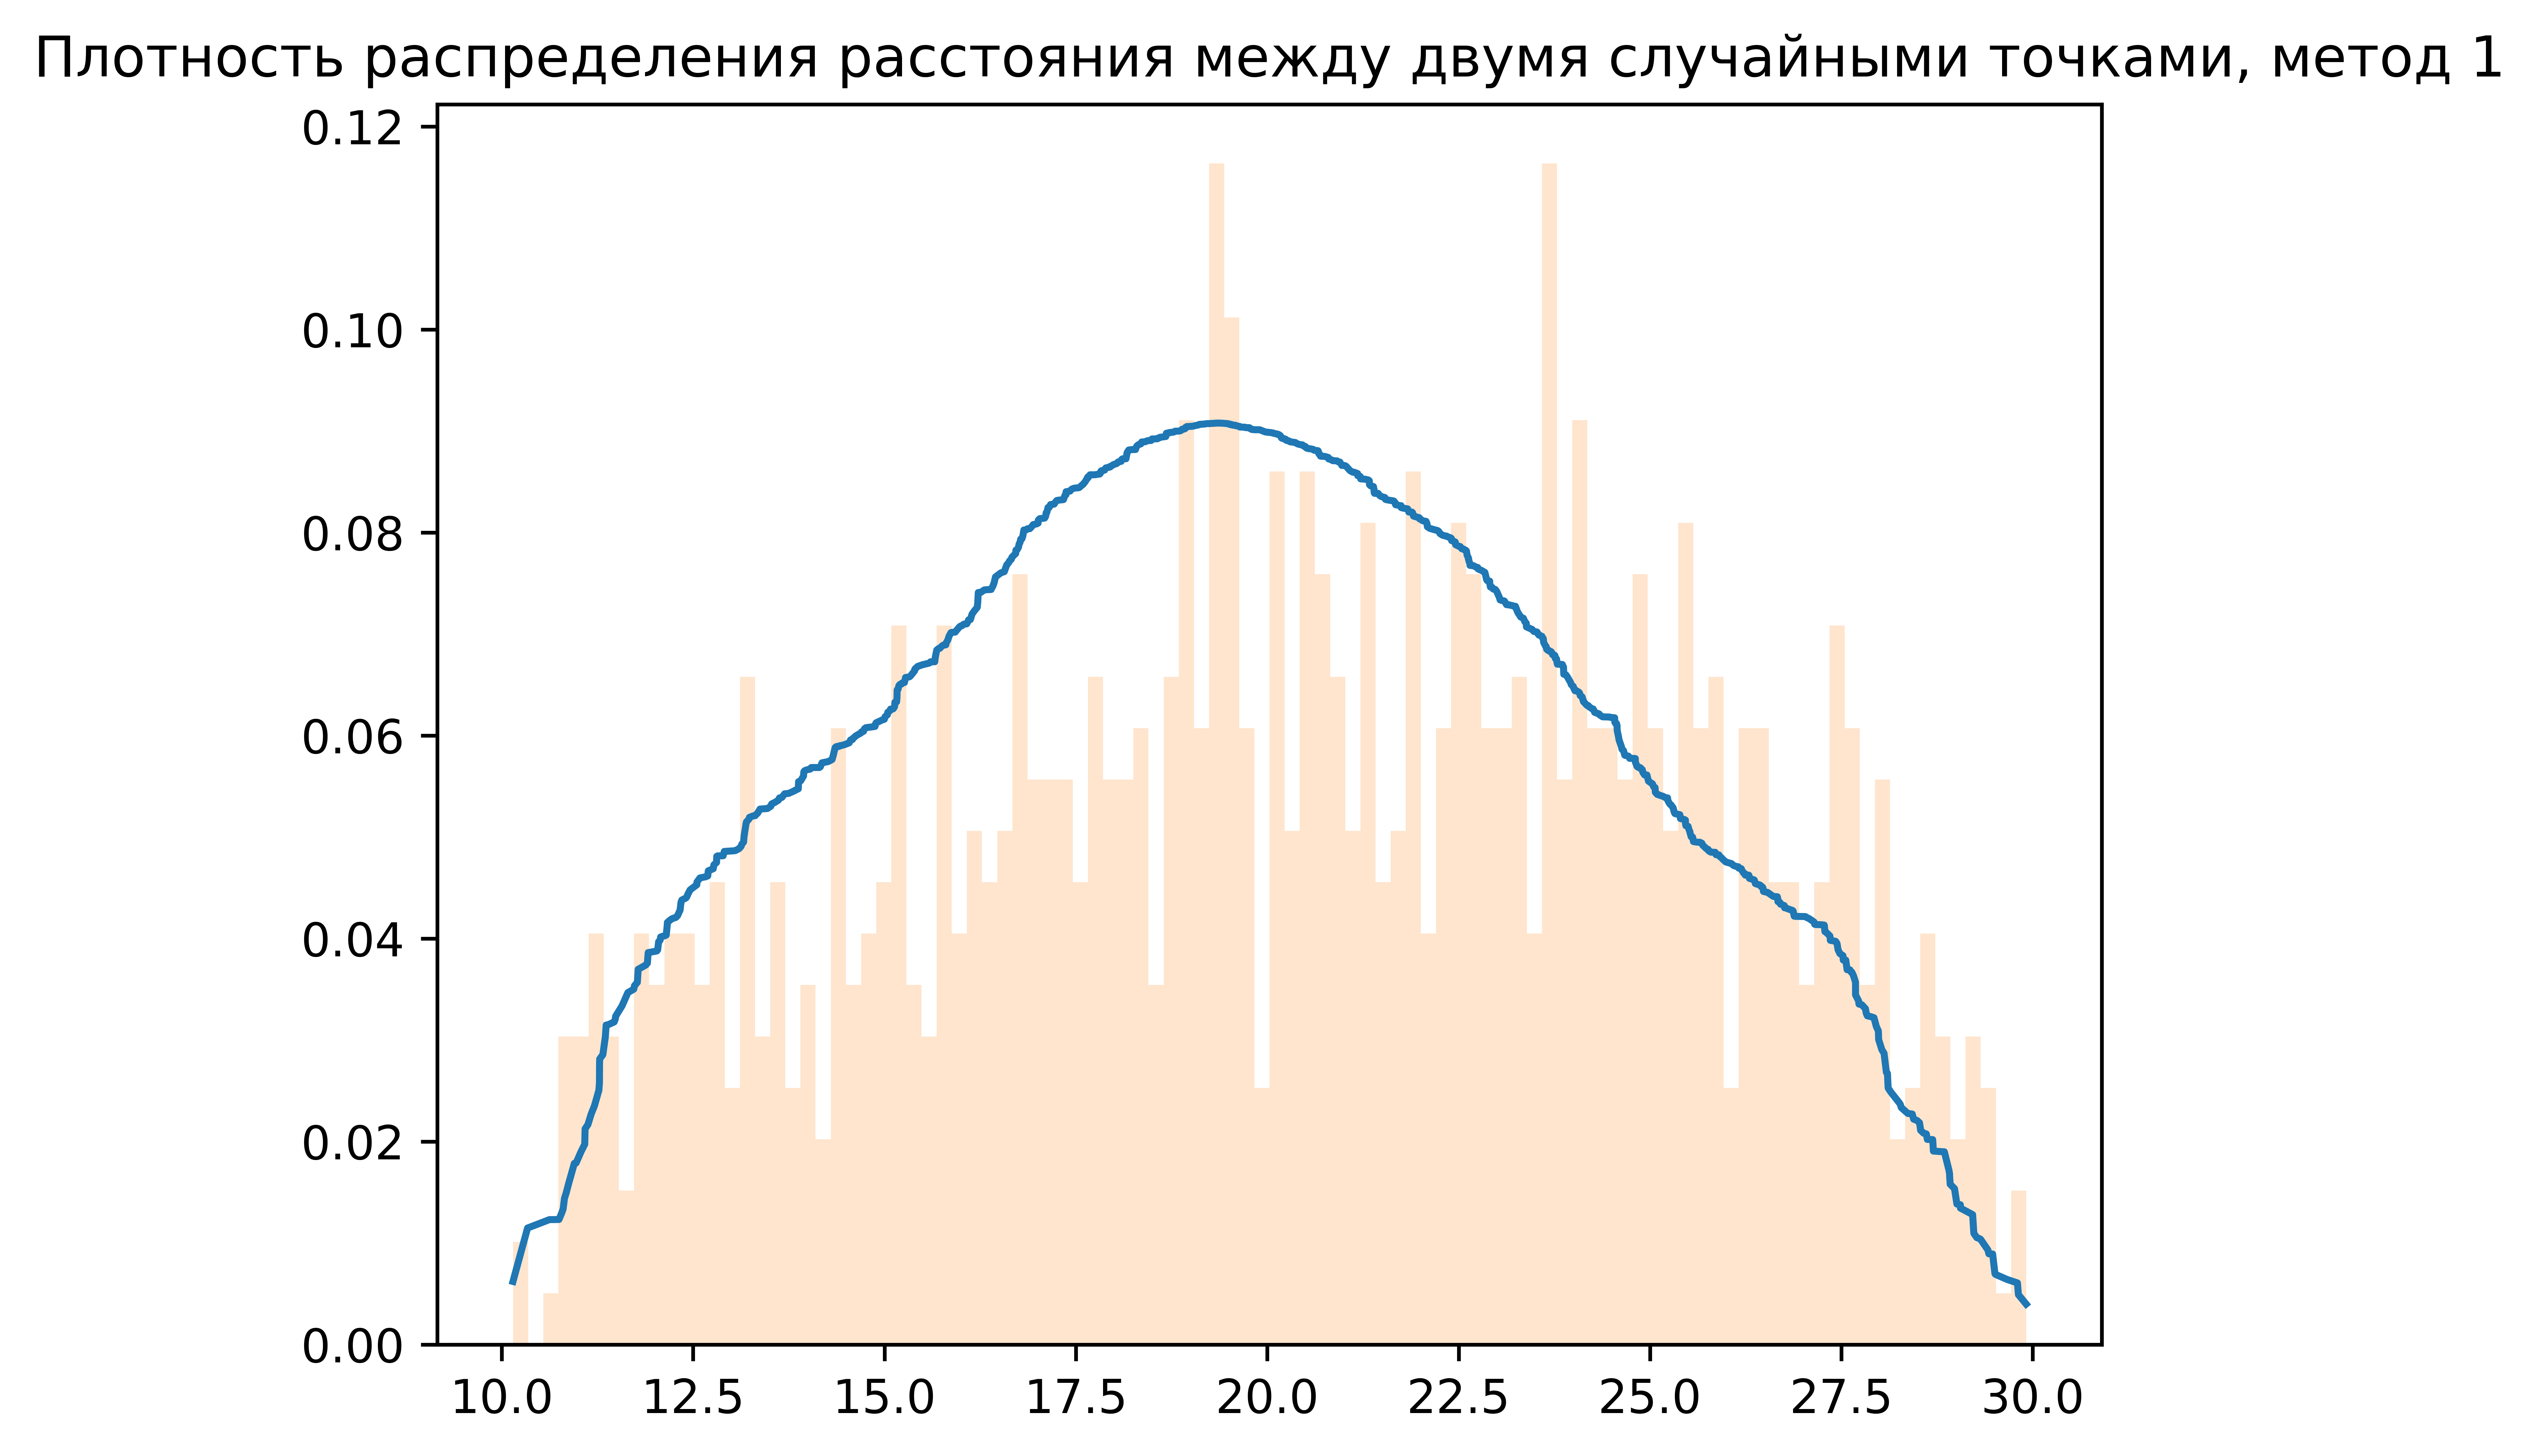

In [18]:
plt.figure(dpi = 1000)
plt.title("Плотность распределения расстояния между двумя случайными точками, метод 1")
plt.plot(distance_1, kde_dist_1_y)
plt.hist(distance_1, bins=100, alpha=0.2, density=True)
plt.show()

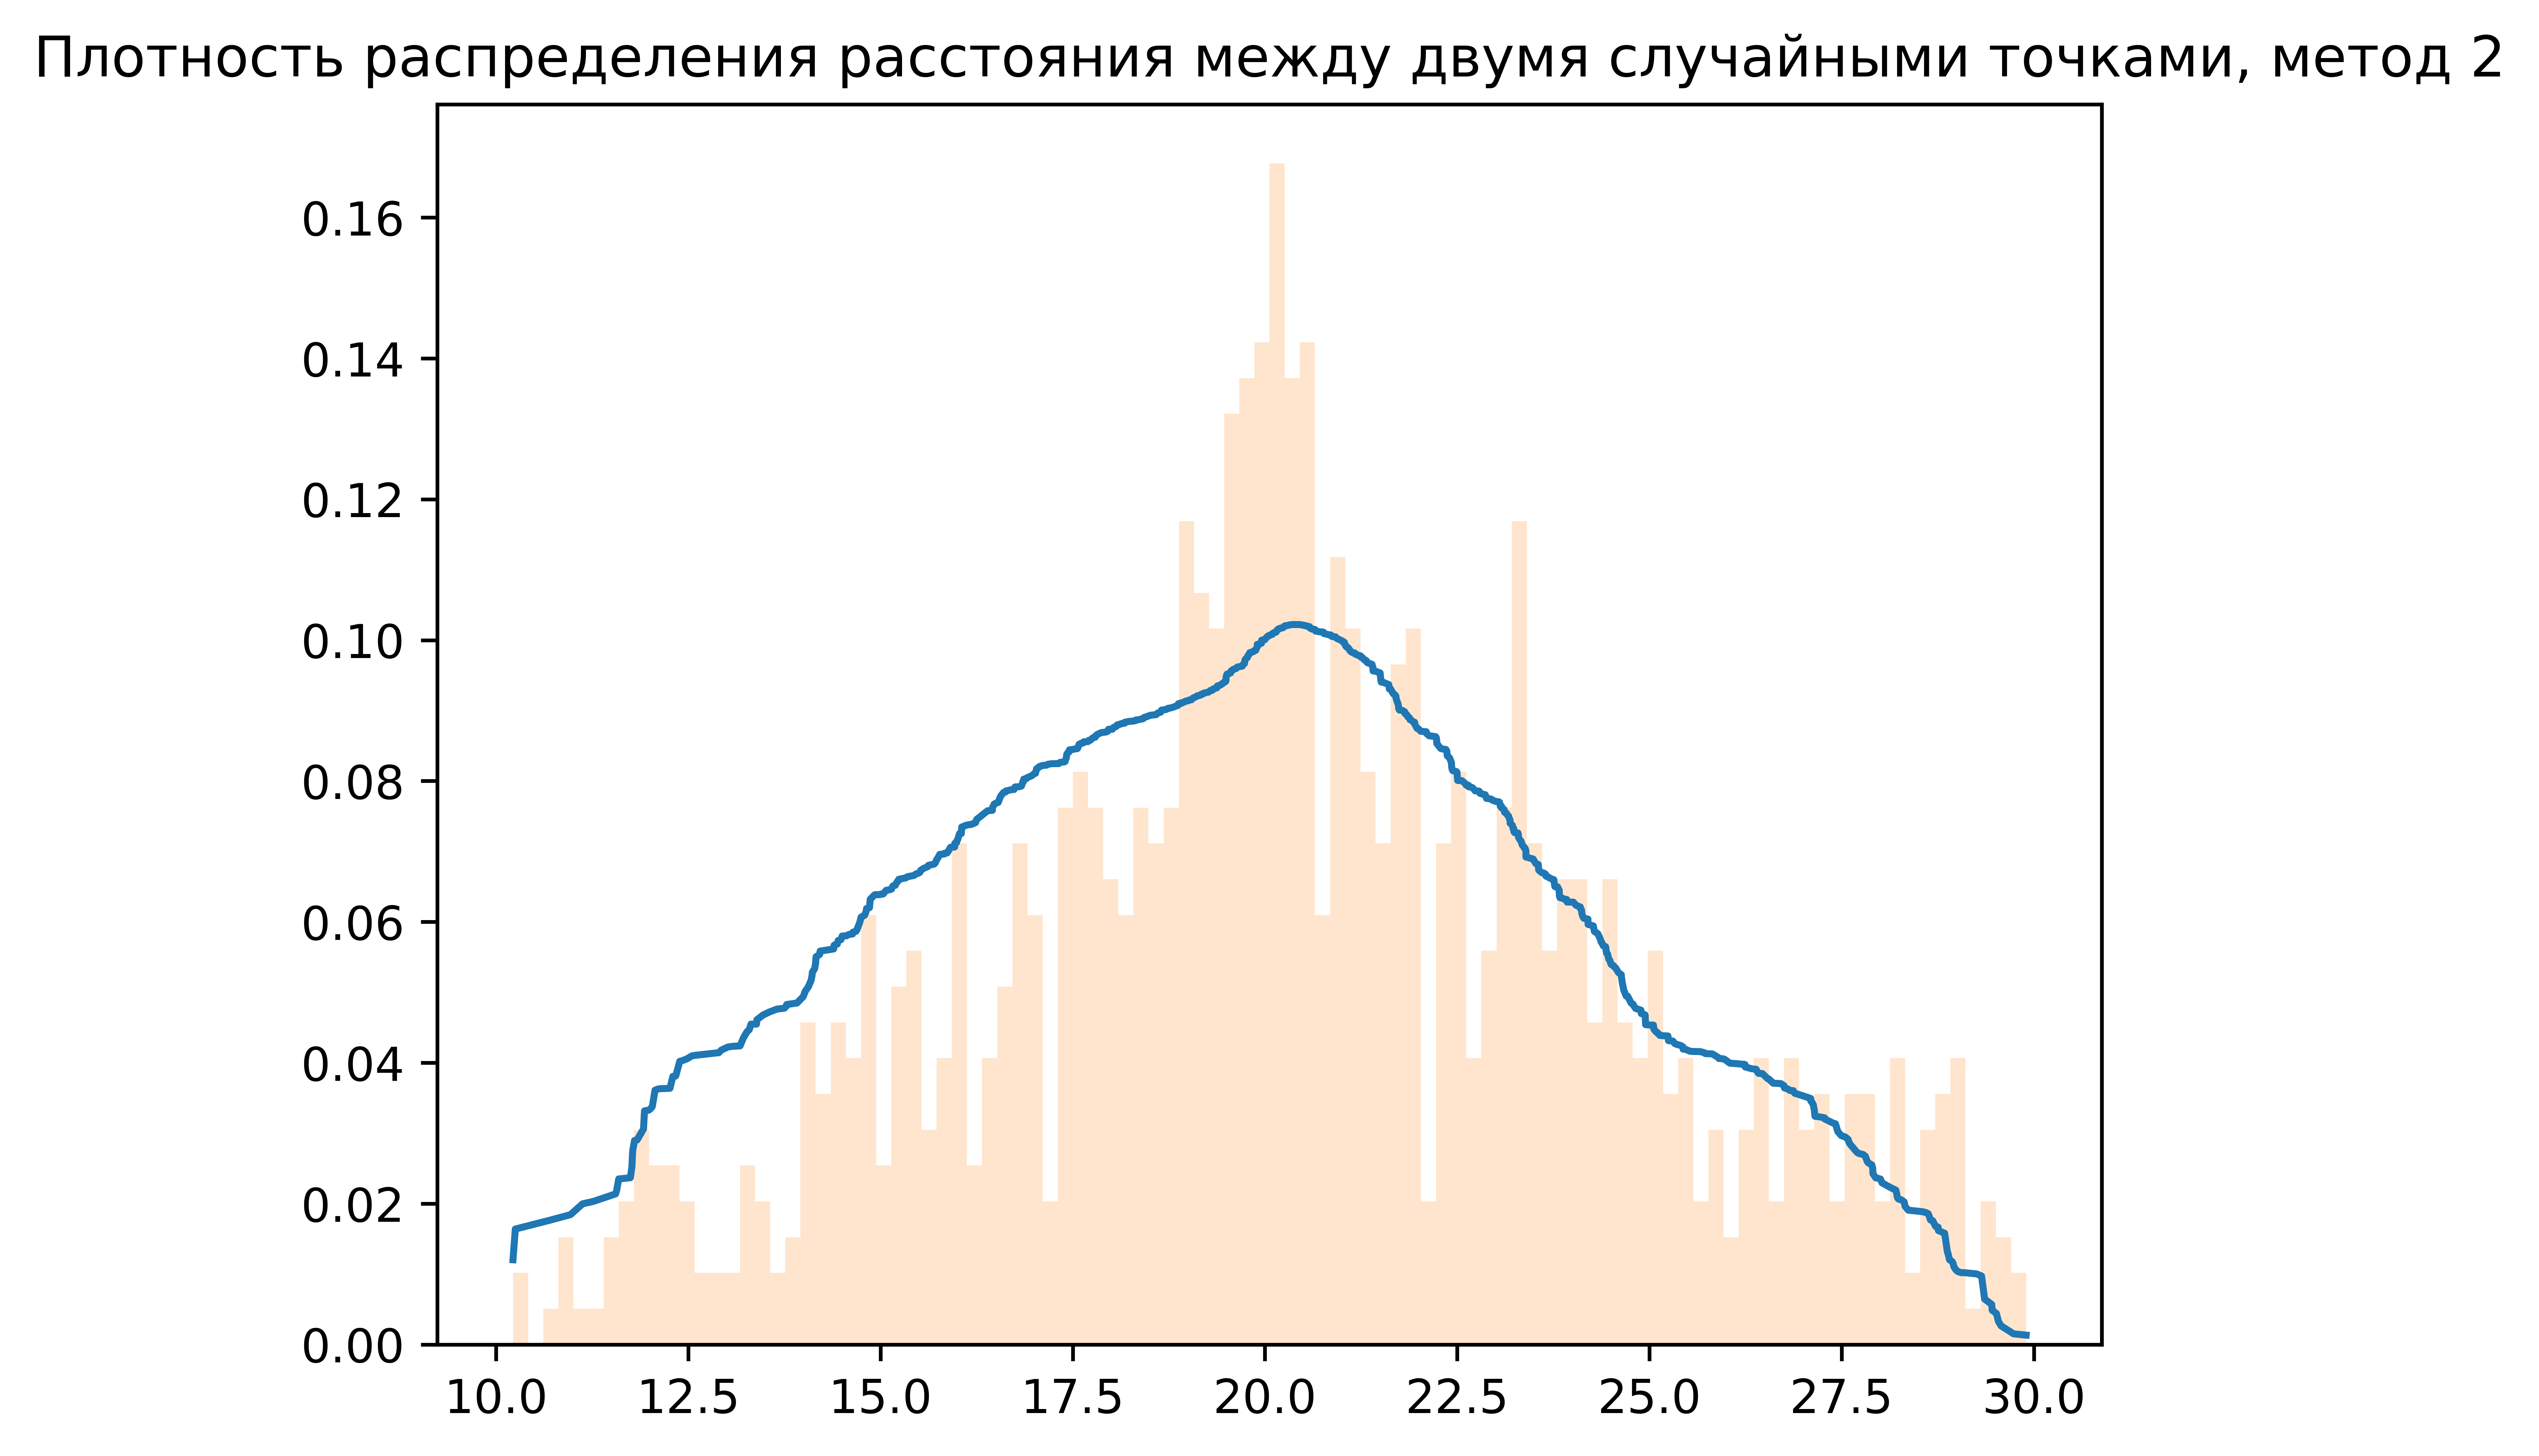

In [20]:
plt.figure(dpi = 1000)
plt.title("Плотность распределения расстояния между двумя случайными точками, метод 2")
plt.plot(distance_2, kde_dist_2_y)
plt.hist(distance_2, bins=100, alpha=0.2, density=True)
plt.show()